In [21]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from common import Fonts, Colors, add_twitter_handle, add_source

In [22]:
stadiums = pd.DataFrame(
    [
        ["Stadium Australia", 75784, "Sydney", "AU"],
        ["Brisbane Stadium", 49461, "Brisbane", "AU"],
        ["Sydney Football Stadium", 40583, "Sydney", "AU"],
        ["Eden Park", 43217, "Auckland", "NZ"],
        ["Melbourne Rectangular Stadium", 27706, "Melbourne", "AU"],
        ["Wellington Regional Stadium", 33132, "Wellington", "NZ"],
        ["Perth Rectangular Stadium", 18727, "Perth", "AU"],
        ["Dunedin Stadium", 25947, "Dunedin", "NZ"],
        ["Hindmarsh Stadium", 13557, "Adelaide", "AU"],
        ["Waikato Stadium", 18009, "Hamilton", "NZ"],
    ],
    columns=["stadium", "capacity", "city", "country"],
).set_index("stadium")
stadiums

,capacity,city,country
stadium,,,
Stadium Australia,75784,Sydney,AU
Brisbane Stadium,49461,Brisbane,AU
Sydney Football Stadium,40583,Sydney,AU
Eden Park,43217,Auckland,NZ
Melbourne Rectangular Stadium,27706,Melbourne,AU
Wellington Regional Stadium,33132,Wellington,NZ
Perth Rectangular Stadium,18727,Perth,AU
Dunedin Stadium,25947,Dunedin,NZ
Hindmarsh Stadium,13557,Adelaide,AU


In [23]:
df = pd.read_csv("data/matches_2023.csv")
df

,match_number,date,stage,home,away,attendance,home_score,away_score,home_penalty_score,away_penalty_score,...,temperature,wind,group,stadium,winner,match_id,result_id,competition_id,stage_id,season_id
0,1,2023-07-20T19:00:00Z,First Stage,NZL,NOR,42137.0,1.0,0.0,0.0,0.0,...,14.0,26.0,A,Eden Park,NZL,400222852,131872,103,285033,285026
1,2,2023-07-20T20:00:00Z,First Stage,AUS,IRL,75784.0,1.0,0.0,0.0,0.0,...,13.0,10.0,B,Stadium Australia,AUS,400222851,131878,103,285033,285026
2,4,2023-07-21T12:30:00Z,First Stage,NGA,CAN,21410.0,0.0,0.0,0.0,0.0,...,12.0,13.0,B,Melbourne Rectangular Stadium,NaN,400222848,131879,103,285033,285026
3,3,2023-07-21T17:00:00Z,First Stage,PHI,SUI,13711.0,0.0,2.0,0.0,0.0,...,8.0,36.0,A,Dunedin Stadium,SUI,400222854,131873,103,285033,285026
4,5,2023-07-21T19:30:00Z,First Stage,ESP,CRC,22966.0,3.0,0.0,0.0,0.0,...,10.0,37.0,C,Wellington Regional Stadium,ESP,400222844,131884,103,285033,285026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,2023-08-12T20:30:00Z,Quarter-final,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stadium Australia,NaN,400258559,134408,103,285031,285026
60,61,2023-08-15T20:00:00Z,Semi-final,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Eden Park,NaN,400258557,134409,103,285030,285026
61,62,2023-08-16T20:00:00Z,Semi-final,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stadium Australia,NaN,400258556,134410,103,285030,285026
62,63,2023-08-19T18:00:00Z,Play-off for third place,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Brisbane Stadium,NaN,400258555,134411,103,285029,285026


In [24]:
df2 = (
    df.groupby("stadium")
    .agg(attendance=("attendance", "mean"))
    .sort_values("attendance", ascending=False)
    .join(stadiums)
)
df2["percent"] = df2["attendance"] * 100 / df2["capacity"]
df2

,attendance,capacity,city,country,percent
stadium,,,,,
Stadium Australia,75784.000000,75784,Sydney,AU,100.000000
Brisbane Stadium,41346.400000,49461,Brisbane,AU,83.593943
Sydney Football Stadium,36960.800000,40583,Sydney,AU,91.074588
Eden Park,35461.833333,43217,Auckland,NZ,82.055287
Melbourne Rectangular Stadium,26002.500000,27706,Melbourne,AU,93.851512
Wellington Regional Stadium,23717.000000,33132,Wellington,NZ,71.583364
Perth Rectangular Stadium,17056.000000,18727,Perth,AU,91.077055
Hindmarsh Stadium,13050.000000,13557,Adelaide,AU,96.260235
Dunedin Stadium,12615.000000,25947,Dunedin,NZ,48.618337


In [25]:
h = df.copy()
h["team"] = h["home"]
a = df.copy()
a["team"] = a["away"]

df3 = a.append(h).set_index("stadium").join(stadiums)
df3 = df3[df3["stage"] == "First Stage"]
df3["percent"] = df3["attendance"] * 100 / df3["capacity"]
df3 = df3.groupby("team").agg(
    attendance=("attendance", "sum"), capacity=("capacity", "sum")
).sort_values("attendance", ascending=False)
df3["percent"] = df3["attendance"]*100/df3["capacity"]
df3

,attendance,capacity,percent
team,,,
AUS,152646.0,152951,99.800590
FRA,128921.0,130627,98.693991
IRL,117733.0,143972,81.774928
USA,111377.0,119566,93.151063
GER,106700.0,117750,90.615711
NZL,100441.0,102296,98.186635
ENG,98305.0,103601,94.888080
NGA,95450.0,126628,75.378273
BRA,90158.0,90724,99.376130


In [26]:
df4 = pd.read_csv("data/matches_2019.csv")
df4 = df4[df4["stage"] == "First Stage"]
print("2019 attendance: ", df4["attendance"].mean())

print("2023 attendance: ", df[df["stage"] == "First Stage"]["attendance"].mean())

2019 attendance:  18497.666666666668
2023 attendance:  25475.8125


<ipython-input-35-1d3e997bea6d>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df2.index + "\n" + df2["city"] + ", " + df2["country"])


<Figure size 4000x3200 with 0 Axes>

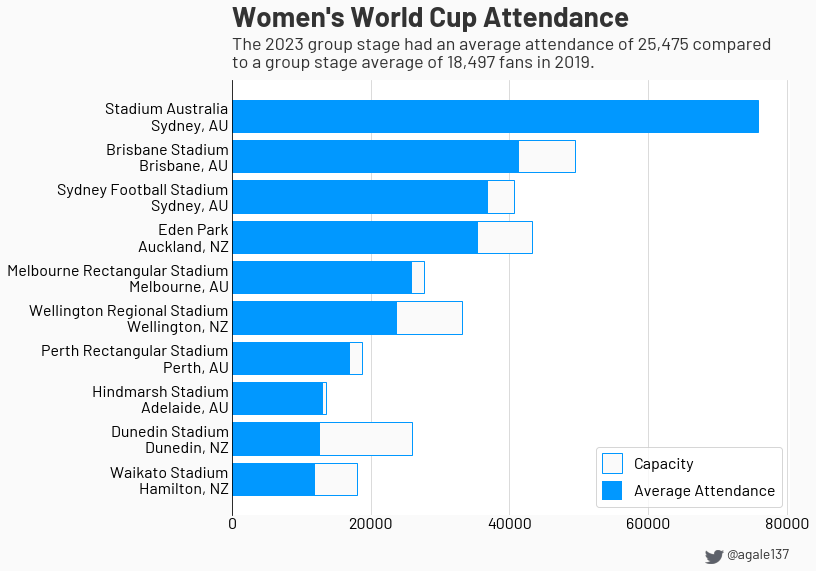

In [35]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "#0198FF"

# Plot data
b1 = plt.barh(df2.index, df2["capacity"], color=Colors.WHITE, edgecolor=BLUE)
b2 = plt.barh(df2.index, df2["attendance"], color=BLUE)

# Legend
fp = Fonts.BARLOW
fp.set_size(16)
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.handleheight'] = 1.5
plt.legend([b1, b2], ["Capacity", "Average Attendance"], loc="lower right", prop=fp)

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.invert_yaxis()
ax.set_yticklabels(df2.index + "\n" + df2["city"] + ", " + df2["country"])
ax.set_xticks([0, 20000, 40000, 60000, 80000])
ax.set_xlim([0, 80500])
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(16)
    label.set_fontproperties(fp)

# Title
ax.text(
    0,
    -2.2,
    "Women's World Cup Attendance",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.2,
    "The 2023 group stage had an average attendance of 25,475 compared\nto a group stage average of 18,497 fans in 2019.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.78, y=0.04, fs=14, w=0.025)

# Save image
plt.savefig(
    "group_stadium_attendance.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)

In [29]:
GROUPS = {
    "A": ["SUI", "NOR", "NZL", "PHI"],
    "B": ["AUS", "NGA", "CAN", "IRL"],
    "C": ["JPN", "ESP", "ZAM", "CRC"],
    "D": ["ENG", "DEN", "CHN", "HAI"],
    "E": ["NED", "USA", "POR", "VIE"],
    "F": ["FRA", "JAM", "BRA", "PAN"],
    "G": ["SWE", "RSA", "ITA", "ARG"],
    "H": ["COL", "GER", "MAR", "KOR"], # TODO: Update order!
}

<Figure size 5600x3200 with 0 Axes>

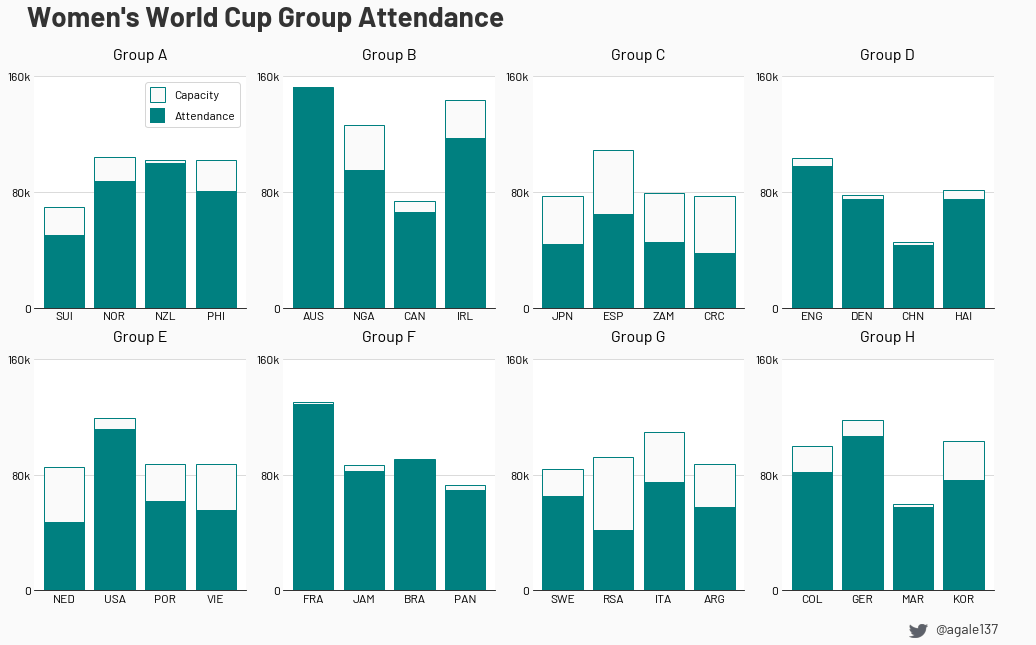

In [33]:
plt.rcParams["figure.figsize"] = (14, 8)
plt.figure(dpi=400)
fig, axs = plt.subplots(2, 4)
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "teal"

# Plot data
for i, group in enumerate(GROUPS.keys()):
    ax = axs[math.floor(i / 4)][i % 4]
    ax.set_title("Group " + group, y=1.05, fontproperties=Fonts.BARLOW, fontsize=16)
    b1 = ax.bar(
        GROUPS[group],
        df3.loc[GROUPS[group]]["capacity"],
        color=Colors.WHITE,
        edgecolor=BLUE,
    )
    b2 = ax.bar(GROUPS[group], df3.loc[GROUPS[group]]["attendance"], color=BLUE)
    
    # Legend
    if i==0:
        fp = Fonts.BARLOW
        fp.set_size(12)
        plt.rcParams['legend.handlelength'] = 1.2
        plt.rcParams['legend.handleheight'] = 1.5
        ax.legend([b1, b2], ["Capacity", "Attendance"], loc="upper right", prop=fp)

    # Axes
    ax.spines[["top", "left", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
    ax.set_ylim([0, 160000])
    ax.set_yticks(range(0, 160001, 80000))
    ax.set_yticklabels(["0", "80k", "160k"])
    ax.tick_params(axis="both", which="both", length=0)
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        fp = Fonts.BARLOW
        fp.set_size(12)
        label.set_fontproperties(fp)

fig.tight_layout()

# Title
plt.text(
    -15.5,
    390000,
    "Women's World Cup Group Attendance",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.9, y=-0.04, fs=14, w=0.025)

# Save image
plt.savefig(
    "group_team_attendance.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)